# Transfer Learning Maarastawi et al. 2018 - phylum
# Table of contents 
1. [Linear Regression](#LinearRegression)
2. [MLP (Dense)](#MLP)
3. [AE combined latent subset features](#AE_combined_subsetFeatures)
4. [AE OTU latent](#AE_latentOTU)

In [1]:
from data import *
from train_2 import *
from transfer_learning import *
from test_functions import *
from layers import *
from utils import *
from loss import *
from metric import *
from results import *
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = \
    read_df_with_transfer_learning_2otufiles_differentDomainFeatures(
              metadata_names=['age','Temperature','Precipitation3Days'],
              otu_filename='data/Aggregated/otu_table_Phylum.csv',
              metadata_filename='data/Aggregated/metadata_table_all_80.csv',
              metadata_names_transfer=['pH','N', 'C', 'C.N'],
              otu_transfer_filename='data/Maarastawi2018/otu_table_Phylum_Maarastawi2018.csv',
              metadata_transfer_filename='data/Maarastawi2018/metadata_table_Maarastawi2018.csv')

In [3]:
print(df_domain_train.shape)
print(df_domain_test.shape)
print(df_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_test.shape)

(4251, 3)
(373, 3)
(86, 4)
(37, 4)


In [4]:
print('TRAIN:')
print('pH:' + str(df_domain_transfer_learning_train.loc[:,'pH'].mean()))
print('N:' + str(df_domain_transfer_learning_train.loc[:,'N'].mean()))
print('C:' + str(df_domain_transfer_learning_train.loc[:,'C'].mean()))
    
print('TEST:')
print('pH:' + str(df_domain_transfer_learning_test.loc[:,'pH'].mean()))
print('N:' + str(df_domain_transfer_learning_test.loc[:,'N'].mean()))
print('C:' + str(df_domain_transfer_learning_test.loc[:,'C'].mean()))

TRAIN:
pH:4.941860465116278
N:0.07779069767441861
C:1.0279069767441862
TEST:
pH:4.818918918918919
N:0.0727027027027027
C:0.9551351351351353


In [5]:
df_microbioma_train

,217700,221349,3609950,4339351,646549,585878,537655,4469039,112867,1081222,357721,368218,1081489,226240,256569,556561
11116.I06A093.1197717,6,478,695,3395,22444,21,30,198,299,150,1,2388,81,821,3,301
11116.L09A088.1196780,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
11116.L11A084.1195839,6,649,649,2209,5169,39,41,130,355,189,14,1588,20,582,5,180
11116.L07A076.1194918,35,653,914,5660,8976,76,69,173,240,14,14,1121,25,1372,2,61
11116.L01A070.1197015,0,175,137,1347,2954,19,11,28,103,9,4,575,6,120,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116.L30A065.1196361,1,328,820,521,2400,103,143,126,322,51,31,1072,21,559,2,243
11116.A11A061.1196939,14,1321,1990,2296,8857,130,168,303,576,18,8,3866,23,817,2,577
11116.L01A079.1194513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11116.L16A071.1195685,11,241,432,2822,4843,28,42,70,196,25,25,770,14,521,2,82


In [6]:
df_microbioma_transfer_learning_train

,217700,221349,3609950,4339351,646549,585878,537655,4469039,112867,1081222,357721,368218,1081489,226240,256569,556561
39,14,62,178,499,2262,0,2,433,390,179,1,402,0,314,0,0
98,105,890,1628,3910,18169,0,37,4061,4445,896,5,8578,3,5437,0,3
83,103,108,1574,953,2436,0,37,554,3747,591,3,524,1,1586,0,5
12,375,357,4112,1441,5367,0,53,2006,5016,1105,6,893,4,2432,0,4
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,95,305,1122,1356,10147,0,36,289,1891,392,2,1143,8,600,0,3
20,246,306,2194,849,7576,0,27,1774,10109,341,4,958,2,1362,0,14
116,128,234,1074,2713,14412,0,12,1863,1399,702,4,1419,0,1853,0,0
67,140,360,1502,2871,15341,0,30,2584,2124,1573,5,2889,0,3037,0,0


### Get numpy transfer_learning objects

In [7]:
data_microbioma_transfer_learning_train = df_microbioma_transfer_learning_train.to_numpy(dtype=np.float32)
data_microbioma_transfer_learning_test = df_microbioma_transfer_learning_test.to_numpy(dtype=np.float32)
data_domain_transfer_learning_train = df_domain_transfer_learning_train.to_numpy(dtype=np.float32)
data_domain_transfer_learning_test = df_domain_transfer_learning_test.to_numpy(dtype=np.float32)

In [8]:
print(df_microbioma_transfer_learning_train.shape)
print(data_microbioma_transfer_learning_train.shape)
print(data_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_train.shape)

(86, 16)
(86, 16)
(86, 4)
(86, 4)


In [9]:
df_microbioma_transfer_learning_train

,217700,221349,3609950,4339351,646549,585878,537655,4469039,112867,1081222,357721,368218,1081489,226240,256569,556561
39,14,62,178,499,2262,0,2,433,390,179,1,402,0,314,0,0
98,105,890,1628,3910,18169,0,37,4061,4445,896,5,8578,3,5437,0,3
83,103,108,1574,953,2436,0,37,554,3747,591,3,524,1,1586,0,5
12,375,357,4112,1441,5367,0,53,2006,5016,1105,6,893,4,2432,0,4
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,95,305,1122,1356,10147,0,36,289,1891,392,2,1143,8,600,0,3
20,246,306,2194,849,7576,0,27,1774,10109,341,4,958,2,1362,0,14
116,128,234,1074,2713,14412,0,12,1863,1399,702,4,1419,0,1853,0,0
67,140,360,1502,2871,15341,0,30,2584,2124,1573,5,2889,0,3037,0,0


# 1. Linear regression <a name="LinearRegression"></a>

In [10]:
def model(shape_in, shape_out, output_transform):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [11]:
def model_fn():
    m = model(shape_in=data_domain_transfer_learning_train.shape[1],
              shape_out=data_microbioma_transfer_learning_train.shape[1],
              output_transform=None)
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.001),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [12]:
latent_space = 0
results, modelsLR = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>99</b></p>

<b>loss</b>: 11.6071 (min: 8.6706, max: 12.8662)

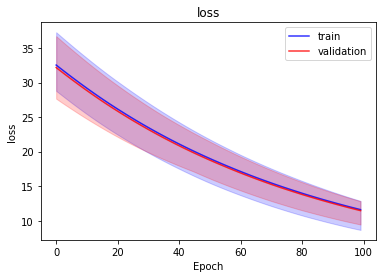

<b>domain_BrayCurtis</b>: 0.6295 (min: 0.4720, max: 0.7837)

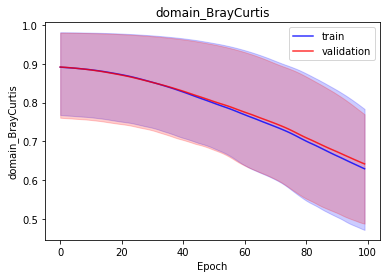

<b>domain_pearson_corr</b>: 0.1701 (min: -0.0485, max: 0.4529)

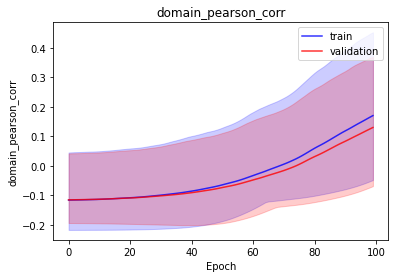

<b>domain_jensen_shannon_divergence</b>: 2.6190 (min: 1.7428, max: 4.8077)

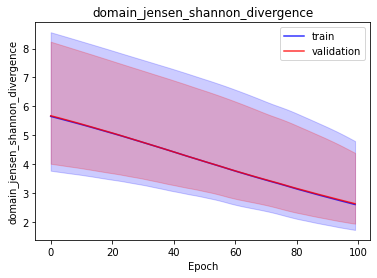

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 11.607092931833616 | 8.670635914457018 | 12.8662012072577 |
| domain_BrayCurtis | 0.6295240521430969 | 0.47201257944107056 | 0.7836961150169373 |
| domain_pearson_corr | 0.17013442516326904 | -0.04846750572323799 | 0.4528854787349701 |
| domain_jensen_shannon_divergence | 2.6190457344055176 | 1.7428210973739624 | 4.807746887207031 |


[('best_lost_epoch', 99),
 ('val_loss', [11.46258487701416, 9.453337669372559, 12.827340126037598]),
 ('val_domain_BrayCurtis', [0.64206094, 0.48817602, 0.76999414]),
 ('val_domain_pearson_corr', [0.129853, -0.06909303, 0.36888987]),
 ('val_domain_jensen_shannon_divergence', [2.6455638, 1.9584016, 4.3996296])]

In [13]:
print_results(results)

In [14]:
predictions = test_model(modelsLR, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_linear_regresion.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.643744945526123 | 0.4993121027946472 | 0.7921504378318787 |
| pearson_corr | 0.15879292786121368 | -0.05682244896888733 | 0.4253426492214203 |
| jensen_shannon_divergence | 2.80871844291687 | 1.9212573766708374 | 4.972332954406738 |


# 2. MLP (Dense) <a name="MLP"></a>

In [15]:
def model(shape_in, shape_out, output_transform, layers_list, activation_fn):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    for s in layers_list:
        net = layers.Dense(s, activation=activation_fn)(net)
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [16]:
def model_fn():
    m = model(shape_in=data_domain_transfer_learning_train.shape[1],
              shape_out=data_microbioma_transfer_learning_train.shape[1],
              output_transform=None,
              layers_list=[128,512],
              activation_fn='tanh')
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.01),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [17]:
latent_space=0
results, modelsMLP = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>94</b></p>

<b>loss</b>: 2.6677 (min: 2.1249, max: 3.4598)

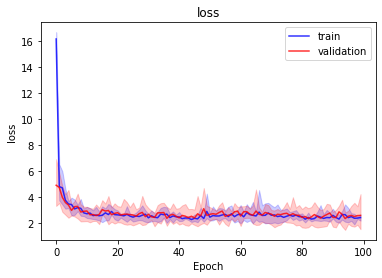

<b>domain_BrayCurtis</b>: 0.2902 (min: 0.2567, max: 0.3495)

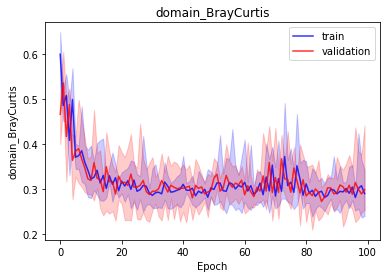

<b>domain_pearson_corr</b>: 0.7784 (min: 0.6751, max: 0.8267)

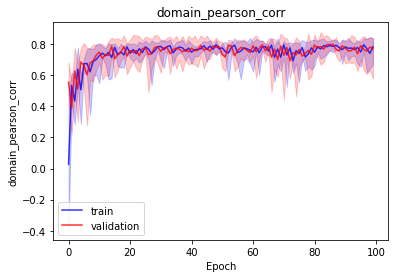

<b>domain_jensen_shannon_divergence</b>: 0.6956 (min: 0.6267, max: 0.7597)

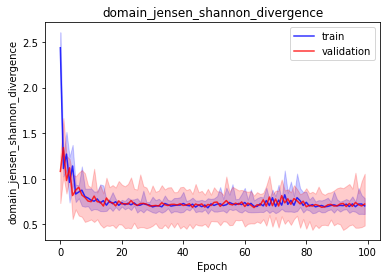

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 2.667699379343714 | 2.1248811293339385 | 3.459759894539328 |
| domain_BrayCurtis | 0.2901915907859802 | 0.256652295589447 | 0.3495076596736908 |
| domain_pearson_corr | 0.7784231901168823 | 0.6751452088356018 | 0.8266567587852478 |
| domain_jensen_shannon_divergence | 0.6956127882003784 | 0.6267384886741638 | 0.7596504092216492 |


[('best_lost_epoch', 94),
 ('val_loss', [2.366632318496704, 1.496006965637207, 2.829446315765381]),
 ('val_domain_BrayCurtis', [0.30818108, 0.26617992, 0.3753856]),
 ('val_domain_pearson_corr', [0.7377079, 0.62765765, 0.80571806]),
 ('val_domain_jensen_shannon_divergence', [0.7296494, 0.48898438, 0.9429448])]

In [18]:
print_results(results)

In [19]:
predictions = test_model(modelsMLP, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.33467644453048706 | 0.2950294017791748 | 0.42049798369407654 |
| pearson_corr | 0.7229841947555542 | 0.6408817768096924 | 0.7675840258598328 |
| jensen_shannon_divergence | 0.9747680425643921 | 0.9115002751350403 | 1.1231892108917236 |


# 3. Auto-encoder combined latent subset features <a name="AE_combined_subsetFeatures"></a>

### Get numpy train objects

In [20]:
data_microbioma_train = df_microbioma_train.to_numpy(dtype=np.float32)
data_domain_train = df_domain_train.to_numpy(dtype=np.float32)

In [21]:
print(data_microbioma_train.shape)
data_domain_train.shape

(4251, 16)


(4251, 3)

### To create auto-encoder combined model

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 10 -> 256 -> 512 -> b |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>99</b></p>

<b>loss</b>: 0.2148 (min: 0.2148, max: 0.2148)

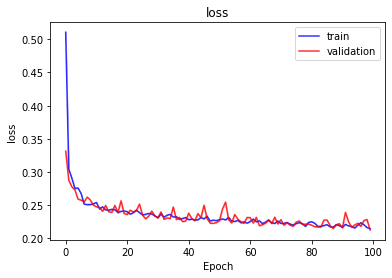

<b>bioma_loss</b>: 0.0370 (min: 0.0370, max: 0.0370)

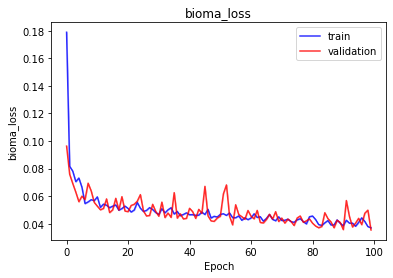

<b>domain_loss</b>: 0.1640 (min: 0.1640, max: 0.1640)

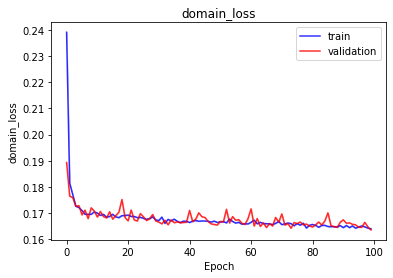

<b>latent_loss</b>: 0.0136 (min: 0.0136, max: 0.0136)

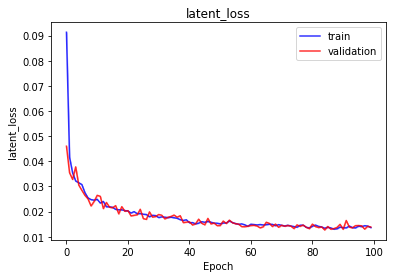

<b>bioma_mse</b>: 0.0001 (min: 0.0001, max: 0.0001)

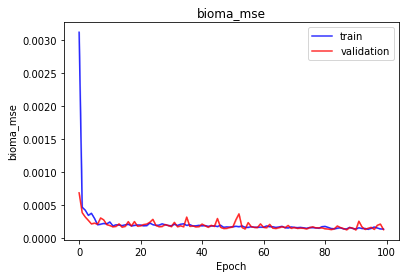

<b>bioma_mae</b>: 0.0044 (min: 0.0044, max: 0.0044)

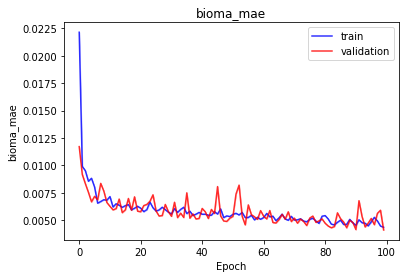

<b>bioma_mape</b>: 37837.9180 (min: 37837.9180, max: 37837.9180)

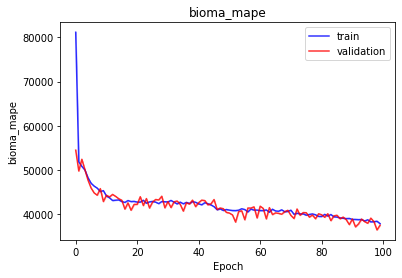

<b>bioma_BrayCurtis</b>: 0.0371 (min: 0.0371, max: 0.0371)

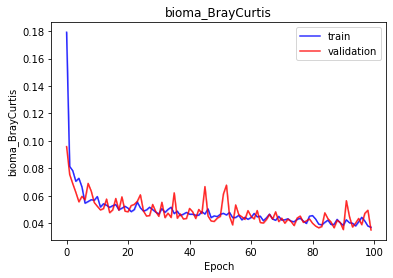

<b>bioma_pearson_corr</b>: 0.9938 (min: 0.9938, max: 0.9938)

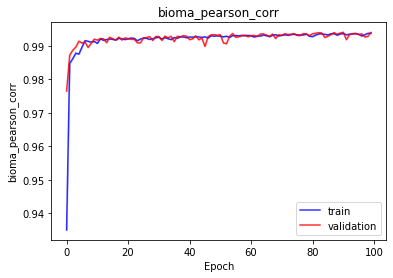

<b>bioma_jensen_shannon_divergence</b>: 0.0475 (min: 0.0475, max: 0.0475)

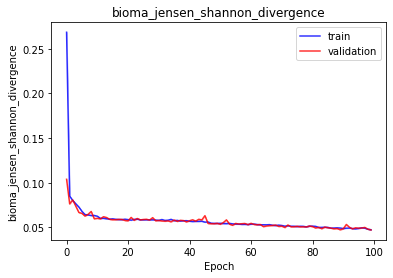

<b>domain_mse</b>: 0.0029 (min: 0.0029, max: 0.0029)

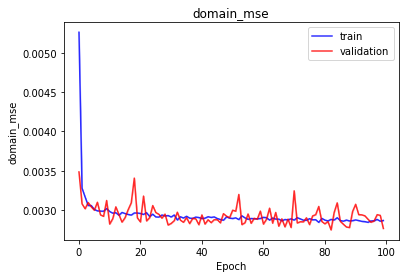

<b>domain_mae</b>: 0.0202 (min: 0.0202, max: 0.0202)

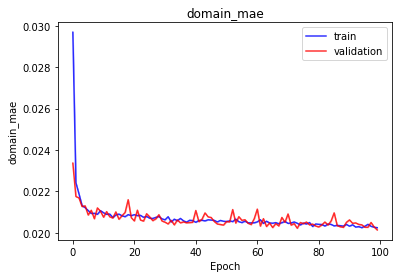

<b>domain_mape</b>: 59177.0586 (min: 59177.0586, max: 59177.0586)

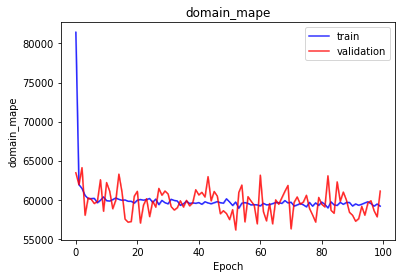

<b>domain_BrayCurtis</b>: 0.1641 (min: 0.1641, max: 0.1641)

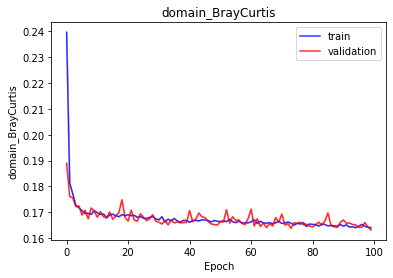

<b>domain_pearson_corr</b>: 0.9563 (min: 0.9563, max: 0.9563)

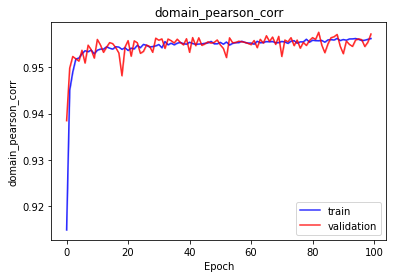

<b>domain_jensen_shannon_divergence</b>: 0.1695 (min: 0.1695, max: 0.1695)

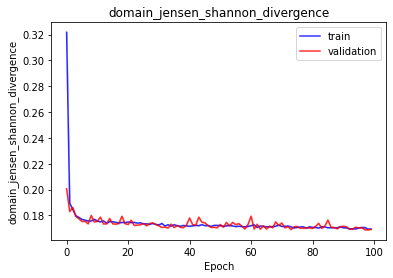

<b>latent_mae</b>: 0.0137 (min: 0.0137, max: 0.0137)

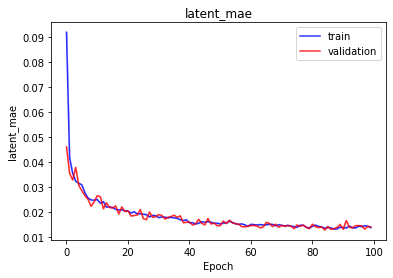

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.2148181358293151 | 0.2148181358293151 | 0.2148181358293151 |
| bioma_loss | 0.0370338000357151 | 0.0370338000357151 | 0.0370338000357151 |
| domain_loss | 0.16395451128482819 | 0.16395451128482819 | 0.16395451128482819 |
| latent_loss | 0.013643660582602024 | 0.013643660582602024 | 0.013643660582602024 |
| bioma_mse | 0.00013598288933280855 | 0.00013598288933280855 | 0.00013598288933280855 |
| bioma_mae | 0.0043711112812161446 | 0.0043711112812161446 | 0.0043711112812161446 |
| bioma_mape | 37837.91796875 | 37837.91796875 | 37837.91796875 |
| bioma_BrayCurtis | 0.03708568960428238 | 0.03708568960428238 | 0.03708568960428238 |
| bioma_pearson_corr | 0.9938416481018066 | 0.9938416481018066 | 0.9938416481018066 |
| bioma_jensen_shannon_divergence | 0.0474773608148098 | 0.0474773608148098 | 0.0474773608148098 |
| domain_mse | 0.002866854192689061 | 0.002866854192689061 | 0.002866854192689061 |
| domain_mae | 0.02024570293724537 | 0.02024570293724537 | 0.02024570293724537 |
| domain_mape | 59177.05859375 | 59177.05859375 | 59177.05859375 |
| domain_BrayCurtis | 0.1640814244747162 | 0.1640814244747162 | 0.1640814244747162 |
| domain_pearson_corr | 0.9562813639640808 | 0.9562813639640808 | 0.9562813639640808 |
| domain_jensen_shannon_divergence | 0.1694551557302475 | 0.1694551557302475 | 0.1694551557302475 |
| latent_mae | 0.013651044107973576 | 0.013651044107973576 | 0.013651044107973576 |


*************

In [22]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=data_domain_train,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [23]:
model, encoder, encoder_domain, decoder = models[0]

### To predict latent space for samples in transfer learning Walters et al. subset

In [24]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

### To build model to predict latent space 
Dense model, with transfer_learning_train. With input=domain, output=10 neurons latent space

In [25]:
def model_fn_tl():
    in_layer = layers.Input(shape=(data_domain_transfer_learning_train.shape[1],))
    net = layers.Dense(128, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.01), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [26]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
#print(result_tl)

In [27]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.007634063716977835 | 2.751221472863108e-11 | 0.267846018075943 |


### a) Domain -> latent -> microbiome. Test set TL

In [28]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.3824360966682434 | 0.3824360966682434 | 0.3824360966682434 |
| pearson_corr | 0.7174516916275024 | 0.7174516916275024 | 0.7174516916275024 |
| jensen_shannon_divergence | 1.1167116165161133 | 1.1167116165161133 | 1.1167116165161133 |


# 4. Auto-encoder OTU latent <a name="AE_latentOTU"></a>

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder |   |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>92</b></p>

<b>loss</b>: 0.0202 (min: 0.0202, max: 0.0202)

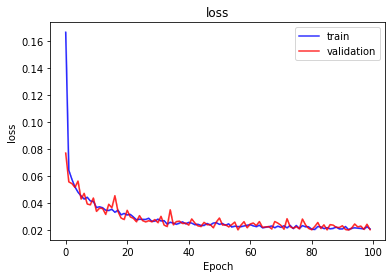

<b>bioma_mse</b>: 0.0001 (min: 0.0001, max: 0.0001)

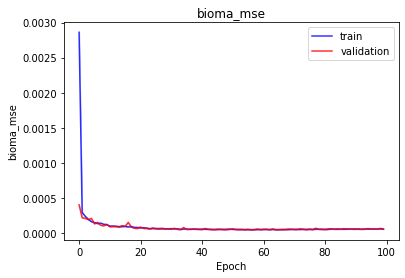

<b>bioma_mae</b>: 0.0023 (min: 0.0023, max: 0.0023)

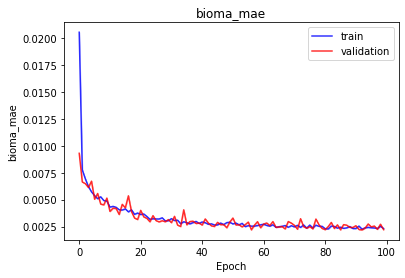

<b>bioma_mape</b>: 34815.7500 (min: 34815.7500, max: 34815.7500)

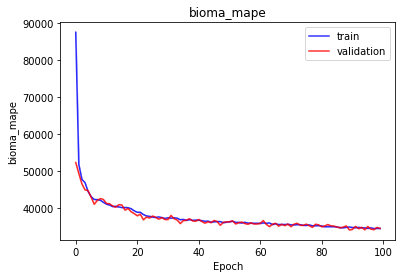

<b>bioma_BrayCurtis</b>: 0.0202 (min: 0.0202, max: 0.0202)

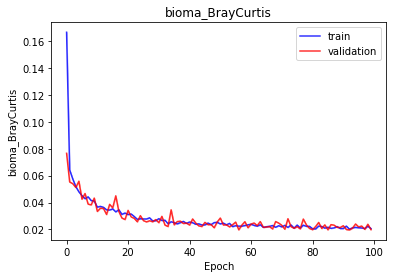

<b>bioma_pearson_corr</b>: 0.9951 (min: 0.9951, max: 0.9951)

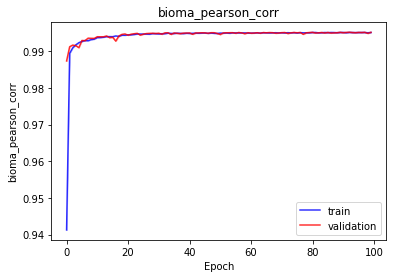

<b>bioma_jensen_shannon_divergence</b>: 0.0379 (min: 0.0379, max: 0.0379)

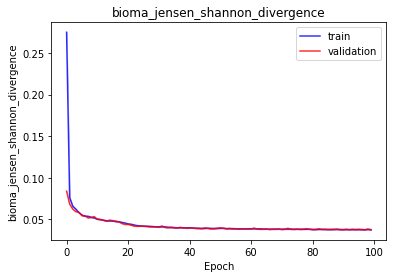

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.020192634209138707 | 0.020192634209138707 | 0.020192634209138707 |
| bioma_mse | 5.392134335124865e-05 | 5.392134335124865e-05 | 5.392134335124865e-05 |
| bioma_mae | 0.0022594642359763384 | 0.0022594642359763384 | 0.0022594642359763384 |
| bioma_mape | 34815.75 | 34815.75 | 34815.75 |
| bioma_BrayCurtis | 0.02019263431429863 | 0.02019263431429863 | 0.02019263431429863 |
| bioma_pearson_corr | 0.9951272010803223 | 0.9951272010803223 | 0.9951272010803223 |
| bioma_jensen_shannon_divergence | 0.037871796637773514 | 0.037871796637773514 | 0.037871796637773514 |


*************

In [29]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=None,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [30]:
model, encoder, _, decoder = models[0]

In [31]:
#encoder = tf.keras.models.load_model('encoder_biome.h5')
#decoder = tf.keras.models.load_model('decoder.h5')

### To predict latent space for samples in transfer learning Walters et al. subset

In [32]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

In [33]:
#print(latent_transfer_learning_test)
with np.printoptions(precision=3, suppress=True):
    #print(latent_transfer_learning_train.min())
    #print(latent_transfer_learning_train.max())
    print(latent_transfer_learning_train.mean(axis=0))
    #print(latent_transfer_learning_test.min())
    #print(latent_transfer_learning_test.max())    
    print(latent_transfer_learning_test.mean(axis=0))

[-0.358  0.662  0.467  0.761 -0.803 -0.282 -0.885 -0.469 -1.     0.76 ]
[-0.306  0.641  0.51   0.686 -0.812 -0.351 -0.847 -0.531 -1.     0.697]


In [34]:
#decoder = tf.keras.models.load_model('decoder.h5')

In [35]:
latent_transfer_learning_train.shape[1]

10

### To build model to predict latent space 

In [36]:
def model_fn_tl():
    in_layer = layers.Input(shape=(data_domain_transfer_learning_train.shape[1],))  
    net = layers.Dense(64, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    net = layers.Dense(16, activation='tanh')(net)  
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.01), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [37]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
print(result_tl)

In [38]:
print_results_noEnsemble(result_tl)

<p>Best iteration: <b>93</b></p>

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.04747308384778715 | 0.03507483001191949 | 0.33371442001919416 |
| domain_mean_squared_error | 0.04747308790683746 | 0.035074830055236816 | 0.33371442556381226 |


In [39]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.04495350643992424 | 8.74024408403784e-10 | 0.776301920413971 |


### Domain -> latent -> microbiome. Test set TL

In [40]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.32325273752212524 | 0.32325273752212524 | 0.32325273752212524 |
| pearson_corr | 0.7654317021369934 | 0.7654317021369934 | 0.7654317021369934 |
| jensen_shannon_divergence | 1.0472432374954224 | 1.0472432374954224 | 1.0472432374954224 |
